--- Running Genetic Algorithm (9 combinations) ---

--- GA Results Summary ---
   crossover      mutation  price  fitness
0  One-point       Bitflip    190      190
1  One-point  Random Reset    180      180
2  One-point          Swap    180      180
3  Two-point       Bitflip    180      180
4  Two-point  Random Reset    180      180
5  Two-point          Swap    180      180
6    Uniform       Bitflip    180      180
7    Uniform  Random Reset    180      180
8    Uniform          Swap    180      180

--- Best Diet Found by GA ---
Combination: One-point + Random Reset
Diet: Oatmeal with Milk, Sandwich with Cheese, Buckwheat Porridge, Apple, Orange Juice, Herbal Tea
Calories=837.0, Protein=27.4, Fat=19.6, Carbs=135.0
Ferrum=6.1mg, Vitamin C=160.0mg
Price=180.00, Fitness (objective function)=180.00


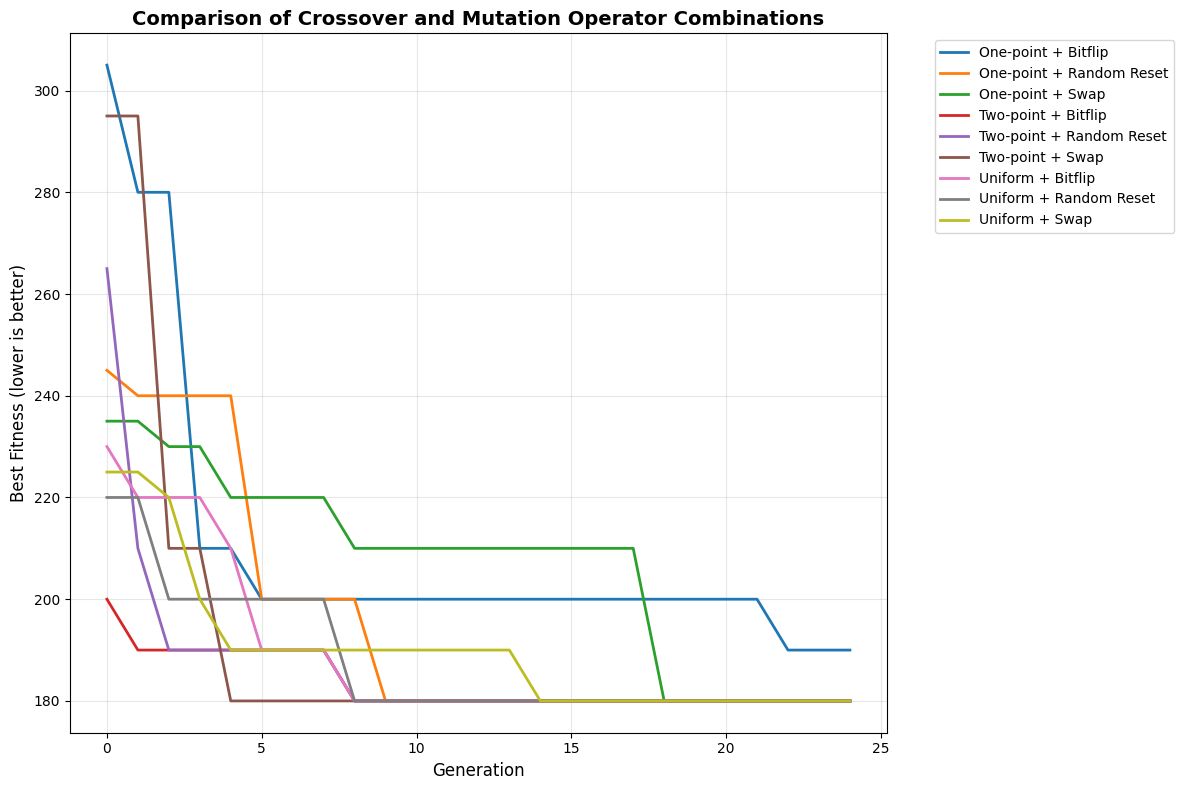

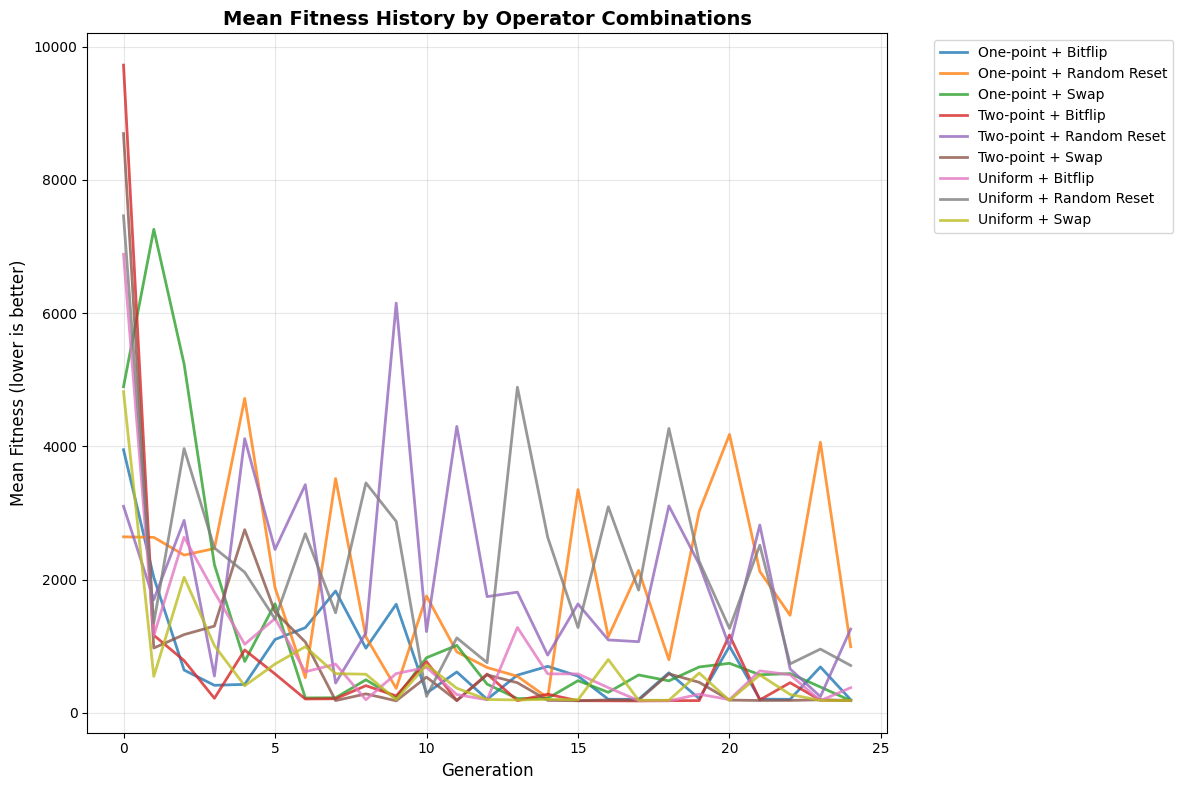

In [5]:
# Import necessary libraries
import random  # for random number generation
import matplotlib.pyplot as plt  # for plotting graphs
import pandas as pd  # for working with data tables
import os  # for creating results directory
import numpy as np

# Define list of products with their characteristics
products = [
# Structure: (Name, Calories, Protein (g), Fat (g), Carbs(g), Ferrum (mg), Vitamin C (mg), Price (rub))
    ("Oatmeal with Milk", 286, 10.0, 8, 45.0, 1.8, 0.0, 15),
    ("Fresh Berries", 41, 0.7, 0.3, 7.7, 0.4, 60.0, 100),
    ("Sandwich with Cheese", 177, 9.0, 9.0, 15.0, 1.0, 0.0, 25),
    ("Greek Salad", 199, 6.0, 15.0, 10.0, 1.2, 45.0, 90),
    ("Chicken Noodle Soup (Bowl)", 187, 15.0, 7.0, 20.0, 1.5, 5.0, 55),
    ("Baked Chicken Breast", 165, 35.0, 3.5, 0.0, 1.0, 0.0, 70),
    ("Buckwheat Porridge", 170, 6.0, 2.0, 30.0, 2.2, 0.0, 15),
    ("Baked Pink Salmon", 169, 22.0, 9.0, 0.0, 0.7, 2.0, 150),
    ("Steamed Asparagus", 68, 3.0, 4.0, 5.0, 2.1, 18.0, 120),
    ("Yogurt", 89, 5.0, 4.8, 6.0, 0.1, 0.5, 35),
    ("Handful of Almonds", 182, 6.0, 15.0, 6.0, 1.5, 0.0, 45),
    ("Apple", 94, 0.4, 0.4, 20.0, 0.5, 10.0, 25),
    ("Orange Juice", 90, 2.0, 0.2, 20.0, 0.5, 100.0, 80),
    ("Herbal Tea", 20, 0.0, 0.0, 5.0, 0.1, 50.0, 20),
]

N = len(products)  # total number of products
K = 6  # number of products to select in the diet

# Define nutritional norms (constraints)
norms = {
    "kcal_min": 500,    # minimum calories
    "kcal_max": 2000,   # maximum calories
    "protein_min": 20,  # minimum protein
    "fat_max": 60,      # maximum fat
    "carbs_max": 250,   # maximum carbohydrates
    "ferrum_max": 15,   # maximum ferrum
    "vitamin_c_min": 75 # minimum vitamin c
}

# Genetic Algorithm parameters
POP = 25 # Population size (number of solutions in each generation)
GEN = 25 # Number of generations (algorithm iterations)
ELITISM = 2 # Number of elite individuals (best solutions passed unchanged to next generation)
TOURNAMENT_SIZE = 4 # Tournament size for selection (number of individuals in tournament)

P_MUT = 0.2 # Mutation probability per individual
P_CROSS = 0.8 # Crossover probability
PENALTY_WEIGHT = 500  # Penalty weight for norm violations

random.seed(1)  # set seed for reproducible results

def get_selected_indexes(chrom):
    """Returns list of selected product indexes from bit mask."""
    return [i for i in range(N) if chrom & (1 << i)]  # check if i-th bit is set

def generate_random_chrom():
    """Generates random chromosome by selecting exactly K products."""
    bits = random.sample(range(N), K)  # select K random indexes
    x = 0  # initialize bit mask to zero
    for b in bits:
        x |= (1 << b)  # set b-th bit to 1
    return x

def totals_for_inds(inds):
    """Sums all nutritional values and price for selected indexes."""
    kcal = 0; protein = 0; fat = 0; carbs = 0; ferrum = 0; vitamin_c = 0; price = 0
    for i in inds:  # for each selected index
        kcal += products[i][1]      # sum calories
        protein += products[i][2]   # sum protein
        fat += products[i][3]       # sum fat
        carbs += products[i][4]     # sum carbs
        ferrum += products[i][5]    # sum ferrum
        vitamin_c += products[i][6] # sum vitamin c
        price += products[i][7]     # sum price
    return kcal, protein, fat, carbs, ferrum, vitamin_c, price

def fitness(chrom, penalty_weight=PENALTY_WEIGHT):
    """
    Fitness function:
    Minimization (Price + Penalty for norm violations).
    """
    inds = get_selected_indexes(chrom)  # get indexes of selected products
    kcal, protein, fat, carbs, ferrum, vitamin_c, price = totals_for_inds(inds)

    penalty = 0  # initialize penalty
    # Check each constraint and add penalty for violation
    if kcal < norms["kcal_min"]: 
        penalty += ((norms["kcal_min"] - kcal) / norms["kcal_min"]) * 100
    if kcal > norms["kcal_max"]: 
        penalty += ((kcal - norms["kcal_max"]) / norms["kcal_max"]) * 100
    if protein < norms["protein_min"]: 
        penalty += ((norms["protein_min"] - protein) / norms["protein_min"]) * 100
    if fat > norms["fat_max"]: 
        penalty += ((fat - norms["fat_max"]) / norms["fat_max"]) * 100
    if carbs > norms["carbs_max"]: 
        penalty += ((carbs - norms["carbs_max"]) / norms["carbs_max"]) * 100
    if ferrum > norms["ferrum_max"]: 
        penalty += ((ferrum - norms["ferrum_max"]) / norms["ferrum_max"]) * 100
    if vitamin_c < norms["vitamin_c_min"]: 
        penalty += ((norms["vitamin_c_min"] - vitamin_c) / norms["vitamin_c_min"]) * 100

    return price + penalty_weight * penalty  # return fitness value

def repair(chrom):
    """
    Repair: ensures exactly K products are selected.
    If > K - removes random ones; if < K - adds random ones.
    """
    bits = get_selected_indexes(chrom)  # get list of selected indexes
    bits = list(bits)
    # if more than K bits - remove randomly selected ones
    while len(bits) > K:
        bits.pop(random.randrange(len(bits)))  # remove random element
    # if less - add random ones that are not in the list
    while len(bits) < K:
        j = random.randrange(N)  # generate random index
        if j not in bits:  # if not already in list
            bits.append(j)  # add it
    # recreate bit mask from corrected index list
    x = 0
    for b in bits:
        x |= (1 << b)  # set bits for selected indexes
    return x

# Crossover operators - recombination operators
def one_point_crossover(a, b):
    """Single-point crossover: exchange chromosome parts at one point."""
    point = random.randint(1, N - 1)   # choose random crossover point
    mask = (1 << point) - 1          # create mask for "left part" (lower bits)
    c1 = (a & mask) | (b & ~mask)    # chromosome 1: left from a, right from b
    c2 = (b & mask) | (a & ~mask)    # chromosome 2: left from b, right from a
    return repair(c1), repair(c2)    # return repaired chromosomes

def two_point_crossover(a, b):
    """Two-point crossover: exchange middle part between two points."""
    p1 = random.randint(1, N-2)      # first crossover point
    p2 = random.randint(p1+1, N-1)   # second crossover point
    mask = ((1 << (p2 - p1)) - 1) << p1  # mask for interval between p1 and p2
    c1 = (a & ~mask) | (b & mask)    # chromosome 1: middle part from b
    c2 = (b & ~mask) | (a & mask)    # chromosome 2: middle part from a
    return repair(c1), repair(c2)

def uniform_crossover(a, b):
    """Uniform crossover: each bit is randomly chosen from one of the parents."""
    c1 = 0  # first child chromosome
    c2 = 0  # second child chromosome
    for i in range(N):  # for each position in chromosome
        if random.random() < 0.5: # 50% chance to choose from either parent
            # c1 takes from a, c2 from b
            if a & (1 << i): c1 |= (1 << i)  # if a has bit set, set in c1
            if b & (1 << i): c2 |= (1 << i)  # if b has bit set, set in c2
        else:
            # c1 takes from b, c2 from a
            if b & (1 << i): c1 |= (1 << i)  # if b has bit set, set in c1
            if a & (1 << i): c2 |= (1 << i)  # if a has bit set, set in c2
    return repair(c1), repair(c2)  # return repaired chromosomes

# Mutation operators - operators for introducing random changes
def mutate_bitflip(chrom, prob=P_MUT):
    """Randomly flips state (0->1 or 1->0) of one bit."""
    if random.random() < prob:  # check if mutation occurs
        i = random.randrange(N)  # choose random position
        chrom ^= (1 << i)  # invert bit using XOR
    return repair(chrom)  # return repaired chromosome

def mutate_random_reset(chrom, prob=P_MUT) -> int:
    """Randomly resets (sets to 0) one or more bits."""
    for pos in range(N):  # for each position in chromosome
        if random.random() < prob:  # check mutation probability for this bit
            chrom &= ~(1 << pos)  # reset bit (set to 0)
    return repair(chrom) # <-- FIXED: Added repair call

def mutate_swap(chrom, prob=P_MUT):
    """Swaps one selected product (1) with one unselected product (0)."""
    if random.random() < prob:  # check if mutation occurs
        bits = get_selected_indexes(chrom)  # get selected products
        zeros = [i for i in range(N) if i not in bits]  # get unselected products
        if bits and zeros:  # if there are products to swap
            sel = random.choice(bits)  # choose random selected product
            new = random.choice(zeros)  # choose random unselected product
            # Remove old bit (sel) and add new bit (new)
            chrom &= ~(1 << sel) # reset old product bit
            chrom |= (1 << new)  # set new product bit
            # No need for repair since number of ones is preserved
            return chrom
    return chrom # Return original chromosome if mutation didn't occur

# Selection operator - parent selection operator
def tournament_select(pop, k=TOURNAMENT_SIZE):
    """Tournament selection: select best individual from k random ones."""
    a = random.sample(pop, k)  # select k random individuals from population
    return min(a, key=fitness)  # return individual with best fitness

def run_ga(crossover_f, mutate_f, pop_size=POP, gens=GEN):
    """Main genetic algorithm loop."""
    pop = [generate_random_chrom() for _ in range(pop_size)]  # create initial population
    history_best = []  # to store history of best fitness values
    history_mean = []  # to store history of mean fitness values

    for g in range(gens):  # for each generation
        pop.sort(key=fitness)  # sort population by fitness
        fitnesses = [fitness(x) for x in pop]  # calculate fitness for all individuals
        history_best.append(min(fitnesses))  # save best value
        history_mean.append(sum(fitnesses)/len(fitnesses))  # save mean value

        new_pop = pop[:ELITISM]  # Elitism: preserve best individuals unchanged

        while len(new_pop) < pop_size:  # until new population is filled
            parent1 = tournament_select(pop)  # select first parent
            parent2 = tournament_select(pop)  # select second parent
            
            # Crossover or copying
            if random.random() < P_CROSS:  # with probability P_CROSS perform crossover
                c1, c2 = crossover_f(parent1, parent2)  # create offspring
            else:
                c1 = parent1  # otherwise copy parents
                c2 = parent2

            # Apply mutation to offspring
            c1 = mutate_f(c1)  # mutate first offspring
            if len(new_pop) < pop_size:  # if there's space in new population
                new_pop.append(c1)  # add first offspring
            if len(new_pop) < pop_size:  # if still space
                c2 = mutate_f(c2)  # mutate second offspring
                new_pop.append(c2)  # add second offspring

        pop = new_pop  # replace old population with new one

    # Final best - find best individual in last population
    best = min(pop, key=fitness)

    return best, history_best, history_mean  # return best individual and history

def pretty_print_solution(chrom):
    """Formats solution for output."""
    inds = get_selected_indexes(chrom)  # get indexes of selected products
    names = [products[i][0] for i in inds]  # get product names
    kcal, protein, fat, carbs, ferrum, vitamin_c, price = totals_for_inds(inds)
    s = {}  # create dictionary to store solution information
    s["names"] = ", ".join(names)  # save string with product names
    s["inds"] = inds  # save indexes
    s["kcal"] = kcal  # save calories
    s["protein"] = protein  # save protein
    s["fat"] = fat  # save fat
    s["carbs"] = carbs  # save carbs
    s["ferrum"] = ferrum  # save ferrum
    s["vitamin_c"] = vitamin_c  # save vitamin c
    s["price"] = price  # save price
    s["fitness"] = fitness(chrom)  # calculate and save fitness value
    return s

# Function combinations for experiments
crossovers = {
    "One-point": one_point_crossover,    # single-point crossover
    "Two-point": two_point_crossover,    # two-point crossover
    "Uniform": uniform_crossover         # uniform crossover
}

mutations = {
    "Bitflip": mutate_bitflip,          # bit flip mutation
    "Random Reset": mutate_random_reset, # random reset mutation
    "Swap": mutate_swap                 # swap mutation
}

# Collect histories for all operator combinations
histories_mean = []  # to store mean value histories
histories_best = []  # to store best value histories
results = []         # to store results of all runs

print("--- Running Genetic Algorithm (9 combinations) ---")
# Iterate through all combinations of crossover and mutation operators
for cross_name, cross_f in crossovers.items():
    for mut_name, mut_f in mutations.items():
        # Run GA with current operator combination
        best, history_best, history_mean = run_ga(cross_f, mut_f)
        sol = pretty_print_solution(best)  # format solution
        sol["crossover"] = cross_name  # save crossover type
        sol["mutation"] = mut_name     # save mutation type
        results.append(sol)            # add result to list

        # Save histories for plotting
        histories_mean.append((cross_name, mut_name, history_mean))
        histories_best.append((cross_name, mut_name, history_best))

# Best GA result among all combinations
df = pd.DataFrame(results)  # create DataFrame from results
best_ga_row = df.loc[df["fitness"].idxmin()]  # find row with minimum fitness

print("\n--- GA Results Summary ---")
print(df[["crossover", "mutation", "price", "fitness"]])  # print summary table
print("\n--- Best Diet Found by GA ---")
print(f"Combination: {best_ga_row['crossover']} + {best_ga_row['mutation']}")
print(f"Diet: {best_ga_row['names']}")
print(f"Calories={best_ga_row['kcal']:.1f}, Protein={best_ga_row['protein']:.1f}, Fat={best_ga_row['fat']:.1f}, Carbs={best_ga_row['carbs']:.1f}")
print(f"Ferrum={best_ga_row['ferrum']:.1f}mg, Vitamin C={best_ga_row['vitamin_c']:.1f}mg")
print(f"Price={best_ga_row['price']:.2f}, Fitness (objective function)={best_ga_row['fitness']:.2f}")

# Plot 1: Fitness history comparison (improved style)
plt.figure(figsize=(12, 8))
for cross_name, mut_name, hist in histories_best:
    combo_name = f"{cross_name} + {mut_name}"
    plt.plot(hist, label=combo_name, linewidth=2)

plt.xlabel("Generation", fontsize=12)
plt.ylabel("Best Fitness (lower is better)", fontsize=12)
plt.title("Comparison of Crossover and Mutation Operator Combinations", fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Mean fitness history (improved style)
plt.figure(figsize=(12, 8))
for cross_name, mut_name, hist in histories_mean:
    combo_name = f"{cross_name} + {mut_name}"
    plt.plot(hist, label=combo_name, linewidth=2, alpha=0.8)

plt.xlabel("Generation", fontsize=12)
plt.ylabel("Mean Fitness (lower is better)", fontsize=12)
plt.title("Mean Fitness History by Operator Combinations", fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()